In [145]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors

In [191]:
log_dfs = list()

for i in range(1):
    log_df = pd.read_csv(Path("../data/211/logs/1/{}.csv".format(i)), index_col=0)
    log_dfs.append(log_df)

log_dfs[0].head(5)
log_df = log_dfs[0]

In [192]:
log_df.head()

,step,time,ff,xray_7mhl,r_free_7mhl,r_work_7mhl,rmsd_7mhl,w_0_7mhl,pdb,copy,...,dxray_dx_2,dcharmm_dx_0,dcharmm_dx_1,dcharmm_dx_2,dxyz_0,dxyz_1,dxyz_2,xyz_0,xyz_1,xyz_2
0,0.0,9.536743e-07,-293.521441,5.508524,0.313378,0.317044,0.000000,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,...,-0.436950,0.461917,1.236454,-0.663256,0.105871,-1.179925,-0.436950,15.401000,0.962000,30.472000
1,1.0,3.281891e+00,-107.534404,5.508624,0.313611,0.317086,0.014505,1.0,NaN,0.0,...,-0.440545,-1.007476,9.090377,5.628767,-0.835578,7.875185,5.188223,15.395375,0.973446,30.471740
2,2.0,4.917205e+00,315.568529,5.508544,0.313864,0.317055,0.027916,1.0,NaN,0.0,...,-0.428244,-2.993089,16.721963,10.559424,-2.778904,15.474168,10.131180,15.389658,0.984961,30.471255
3,3.0,6.474944e+00,704.189911,5.508194,0.314406,0.316888,0.039829,1.0,NaN,0.0,...,-0.421290,-6.231909,22.491665,11.758099,-5.939952,21.201711,11.336809,15.383670,0.995383,30.469108
4,4.0,7.997811e+00,869.795345,5.507405,0.314937,0.316583,0.049663,1.0,NaN,0.0,...,-0.374878,-10.973583,25.226354,8.370221,-10.606955,23.858259,7.995343,15.377862,1.003754,30.465003


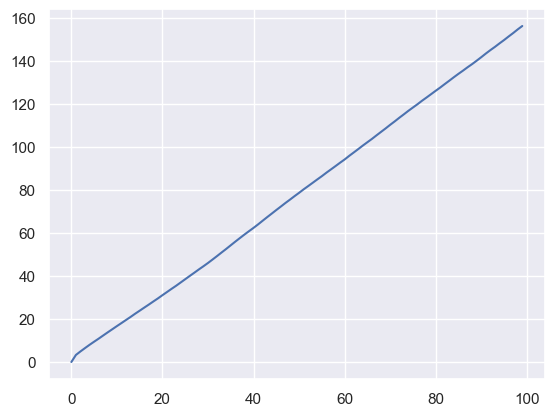

In [193]:
plt.plot(log_dfs[0].index[0:100], log_dfs[0]['time'][0:100])

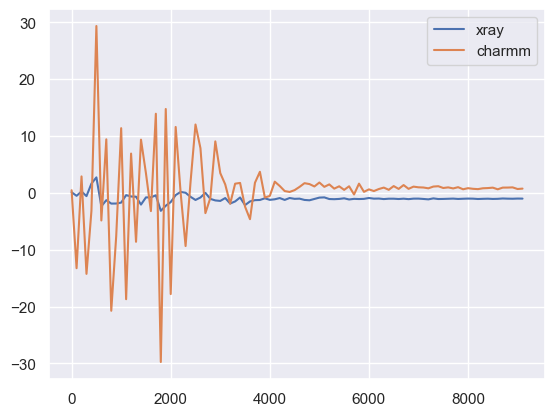

In [198]:
start, end, offset = 0, 15000, 100

log_df = log_dfs[0]
plt.plot(log_df["step"][start:end:offset], log_df["dxray_dx_0"][start:end:offset], label="xray")
plt.plot(log_df["step"][start:end:offset], log_df["dcharmm_dx_0"][start:end:offset], label="charmm")

# for term in ["charmm", "bnd", "ang", "dih", "imp", "nbd"]:
#     plt.plot(log_df["step"][start:end], log_df["d{}_dx_0".format(term)][start:end], label=term, alpha=0.5)

plt.legend()
plt.savefig(Path(Path.home(), "Desktop/plot.png"))

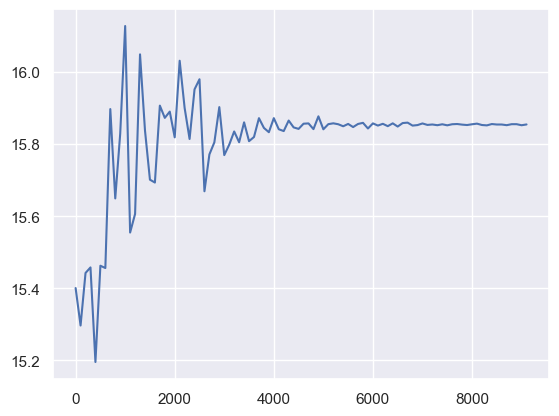

In [199]:
for i in range(1):
    log_df = log_dfs[i]
    plt.plot(log_df["step"][start:end:offset], log_df["xyz_0"][start:end:offset])
    plt.savefig(Path(Path.home(), "Desktop/plot.png"))


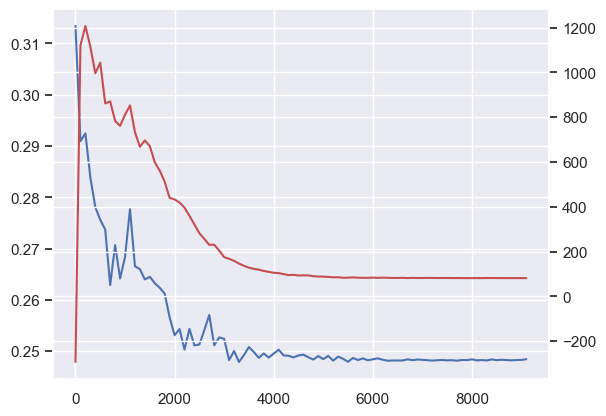

In [200]:
fig, ax1 = plt.subplots()

ax1.plot(log_df["step"][start:end:offset], log_df["r_free_7mhl"][start:end:offset], c="b")
ax2 = ax1.twinx()
ax2.plot(log_df["step"][start:end:offset], log_df["ff"][start:end:offset], c="r")

plt.savefig(Path(Path.home(), "Desktop/plot.png"))



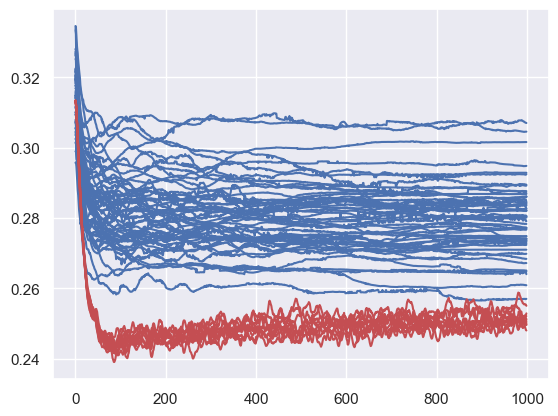

In [201]:
for i in range(1,54):
    log_df = pd.read_csv(Path("../data/213/logs/{}/0.csv".format(i)), index_col=0)
    plt.plot(log_df["step"][start:end], log_df["r_free_7mhl"][start:end], c="b")

for i in range(10):
    log_df = pd.read_csv(Path("../data/202/logs/11/{}.csv".format(i)), index_col=0)
    plt.plot(log_df["step"][:1000], log_df["r_free_7mhl"][:1000], c="r")

plt.savefig(Path(Path.home(), "Desktop/plot.png"))


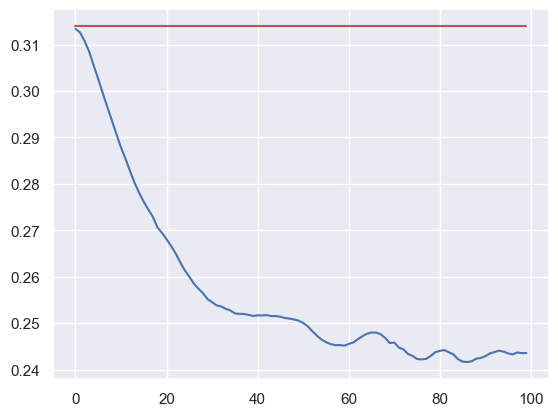

In [134]:
plt.plot(log_df["step"][:100], log_df["r_free_7mhl"][:100], c="b")
plt.plot(log_df["step"][:100], [.314]*100, c="r")
plt.savefig(Path(Path.home(), "Desktop/plot.png"))

In [136]:
log_df.loc[0,"r_free_7mhl"]

0.3133778904996823